In [1]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
from metasense.data import load_board
import matplotlib.pyplot as plt

In [2]:
(X_train, Y_train), (X_test, Y_test) = load_board(4)

In [3]:
X_train.columns

Index(['co-corr', 'co', 'co-u', 'co-A', 'co-W', 'no2-corr', 'no2', 'no2-u',
       'no2-A', 'no2-W', 'o3-corr', 'o3', 'o3-u', 'o3-A', 'o3-W',
       'temperature', 'pressure', 'humidity', 'pt', 'nc', 'epa-temperature',
       'epa-humidity'],
      dtype='object')

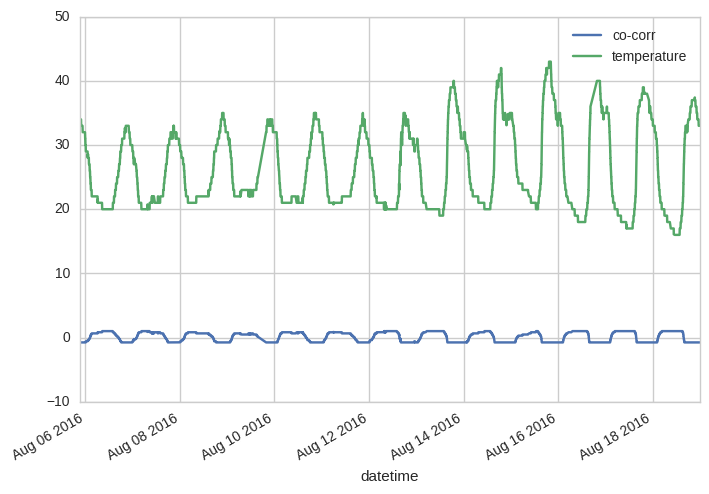

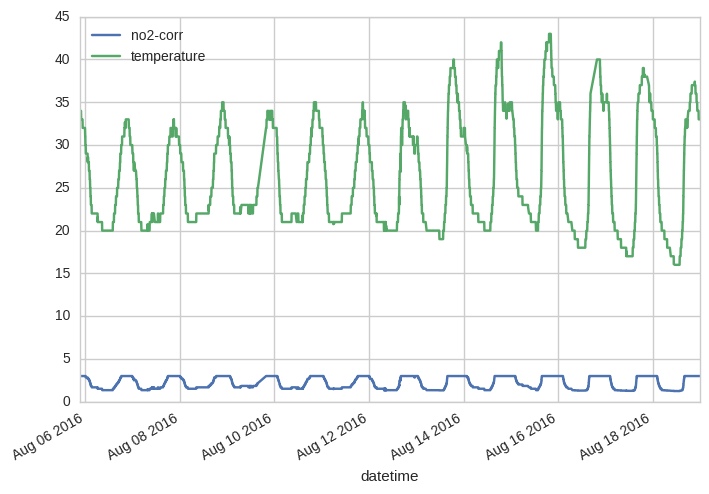

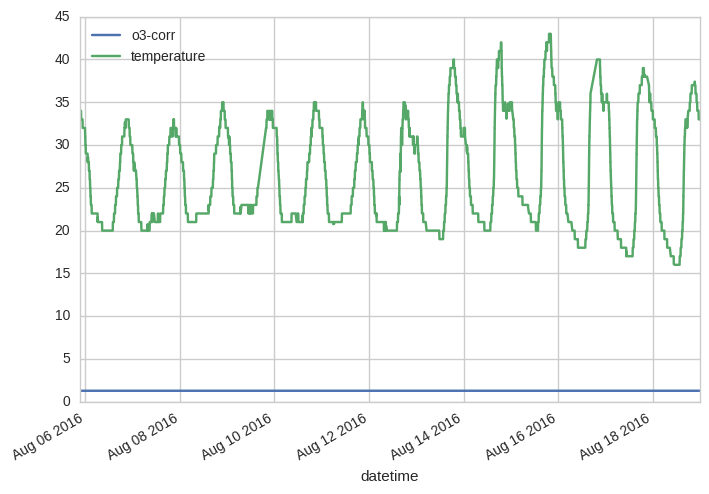

In [4]:
X_train.plot(y=['co-corr', 'temperature'])
X_train.plot(y=['no2-corr', 'temperature'])
X_train.plot(y=['o3-corr', 'temperature'])
plt.show()

In [5]:
def plot_column(column, use_corrections=False):
    plt.figure()
    co_mean = X_train[column].mean()
    co_std = X_train[column].std()
    co = (X_train[column] - co_mean) / co_std
    co.plot(label='corrected', alpha=0.5)
    
    co__mean = X_train_[column+'-u'].mean()
    co__std = X_train_[column+'-u'].std()
    co_ = (X_train_[column+'-u'] - co__mean) / co__std
    co_.plot(label='uncorrected', alpha=0.5)
    
    y_co_mean = Y_train["epa-%s" % column].mean()
    y_co_std = Y_train["epa-%s" % column].std()
    y_co = (Y_train["epa-%s" % column] - y_co_mean) / y_co_std
    y_co.plot(label='actual')
    plt.legend(loc='best')
    plt.title(column)
    plt.show()

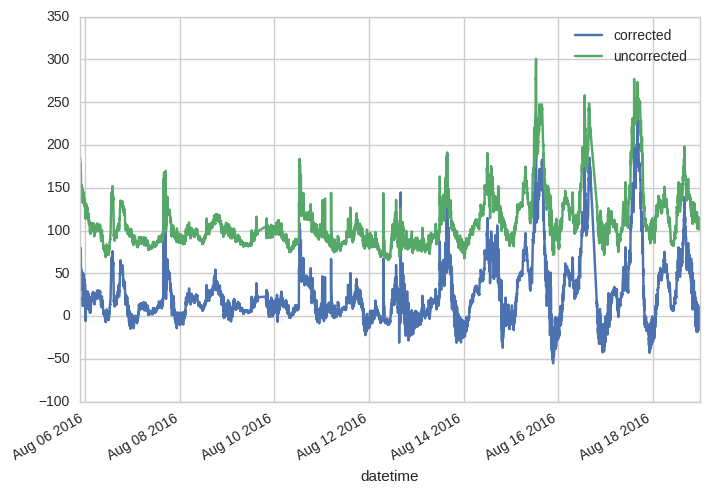

In [6]:
X_train['co'].plot(label='corrected')
X_train['co-u'].plot(label='uncorrected')
plt.legend(loc='best')
plt.show()

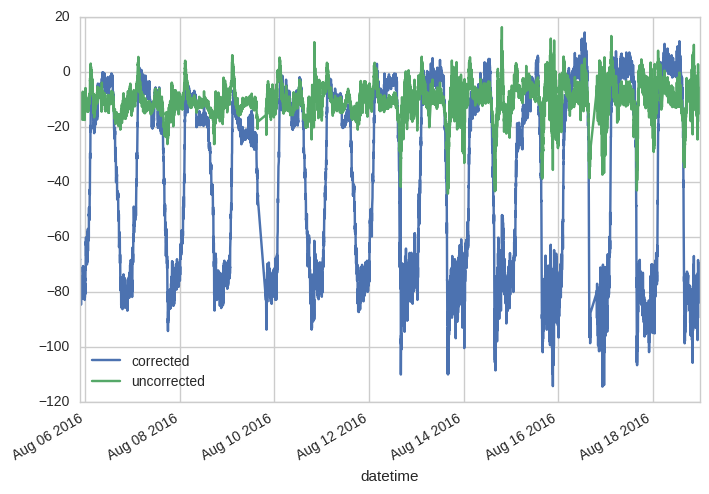

In [7]:
X_train['no2'].plot(label='corrected')
X_train['no2-u'].plot(label='uncorrected')
plt.legend(loc='best')
plt.show()

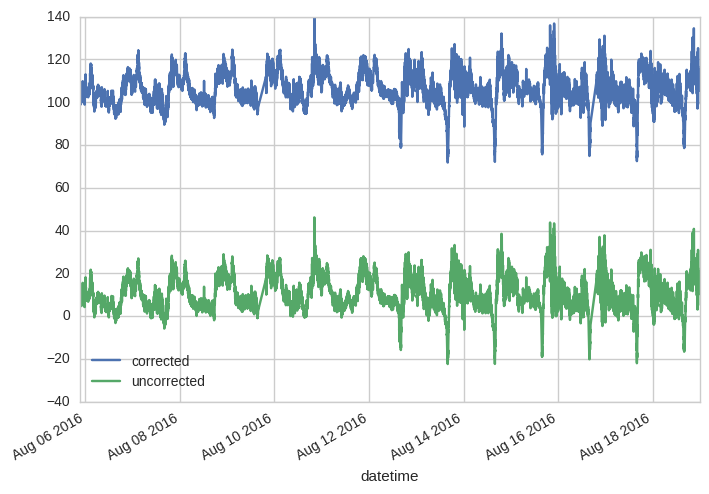

In [8]:
X_train['o3'].plot(label='corrected')
X_train['o3-u'].plot(label='uncorrected')
plt.legend(loc='best')
plt.show()

# With corrections

In [ ]:
plot_column('co')
plot_column('no2')
plot_column('o3')

# Without corrections

In [ ]:
plot_column('co', use_corrections=False)
plot_column('no2', use_corrections=False)
plot_column('o3', use_corrections=False)

# Why is NO2 messed up?

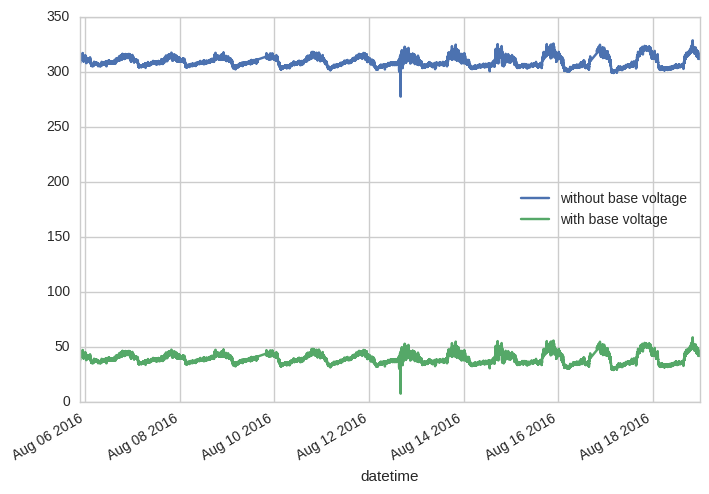

In [14]:
(X_train['no2-A']).plot(label='without base voltage')
(X_train['no2-A'] - 270).plot(label='with base voltage')
plt.legend(loc='best')
plt.show()

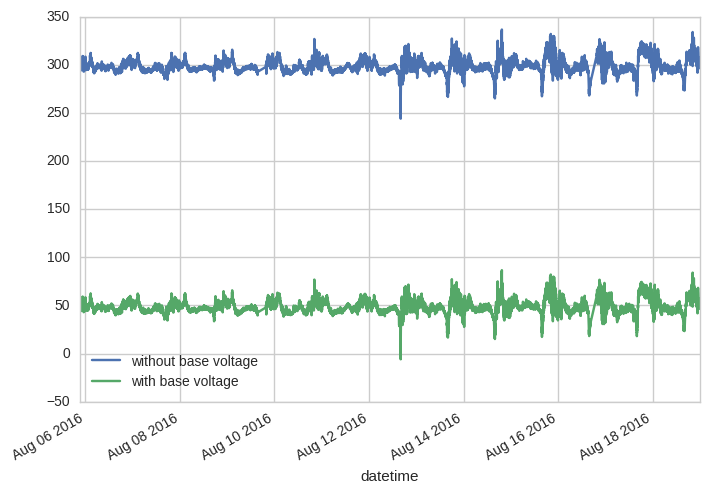

In [15]:
(X_train['no2-W']).plot(label='without base voltage')
(X_train['no2-W'] - 250).plot(label='with base voltage')
plt.legend(loc='best')
plt.show()

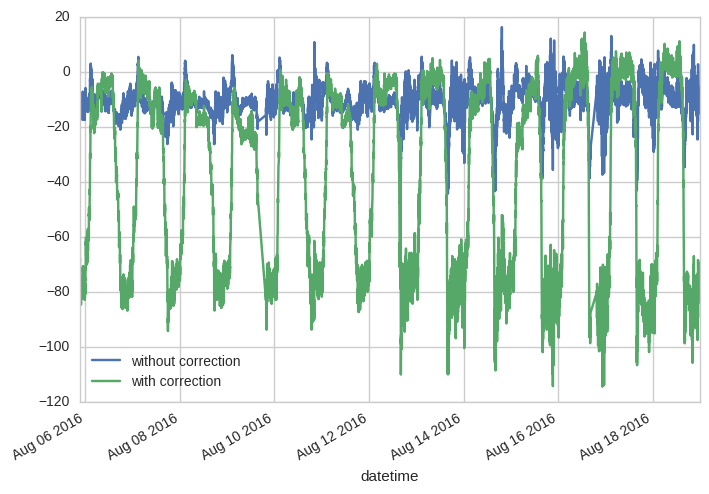

In [16]:
((X_train['no2-W']) - (X_train['no2-A'])).plot(label='without correction')
((X_train['no2-W'] - 250) - X_train['no2-corr'] * (X_train['no2-A'] - 270)).plot(label='with correction')
plt.legend(loc='best')
plt.show()

In [14]:
X_train[['no2-corr', 'temperature']].describe()

,no2-corr,temperature
count,16707.000000,16707.000000
mean,2.204525,26.548515
std,0.702590,6.508999
min,1.246000,16.000000
25%,1.515000,21.000000
50%,2.010000,24.000000
75%,3.000000,32.000000
max,3.000000,43.000000
